<a href="https://colab.research.google.com/github/IT21049972/EmailArmour/blob/main/Language__detection__model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##import library


In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# model building tools
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Data preprocessing

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Email Armor/Datasets/Function 01/Language Dataset/dataset.csv")
df.head(20)

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
7,müller mox figura centralis circulorum doctoru...,Latin
8,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese


In [ ]:
df.language.value_counts()

language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: count, dtype: int64

In [ ]:
# function to clean text
def clean_txt(text):
    text=text.lower()
    text=re.sub(r'[^\w\s]',' ',text)
    text=re.sub(r'[_0-9]',' ',text)
    text=re.sub(r'\s\s+',' ',text)
    return text

# example
txt = 'my (&*(()))name %$#is harsh_priye'
print(clean_txt(txt))

my name is harsh priye


In [ ]:
x= [clean_txt(text) for text in df["Text"]]

In [ ]:
print(x)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# using Tfidf Vectorizer:
tfidf = TfidfVectorizer()
tfidf.fit(x)
x_ready = tfidf.transform(x)

In [ ]:
print(x_ready)
print(x_ready.shape)

  (0, 122429)	0.11632821567894927
  (0, 122098)	0.15245962403688545
  (0, 122097)	0.15245962403688545
  (0, 117124)	0.13392659423607992
  (0, 113245)	0.1389042716940385
  (0, 112024)	0.15245962403688545
  (0, 106285)	0.08285492222494331
  (0, 104967)	0.42661618752454356
  (0, 80288)	0.15245962403688545
  (0, 80287)	0.15245962403688545
  (0, 80056)	0.1464612850687559
  (0, 79323)	0.15245962403688545
  (0, 77619)	0.08182087878336176
  (0, 76696)	0.1389042716940385
  (0, 75304)	0.16625026948941637
  (0, 75247)	0.2290289414877052
  (0, 67654)	0.15245962403688545
  (0, 67653)	0.15245962403688545
  (0, 63450)	0.2433938789015453
  (0, 63122)	0.13392659423607992
  (0, 60954)	0.1464612850687559
  (0, 59244)	0.15245962403688545
  (0, 57772)	0.1389042716940385
  (0, 55264)	0.26785318847215983
  (0, 53103)	0.1322820868685367
  :	:
  (21999, 104844)	0.16248852574304734
  (21999, 103845)	0.18186228813180896
  (21999, 102254)	0.18987120980426156
  (21999, 101742)	0.3576348748525535
  (21999, 101537)	

In [ ]:
enc = LabelEncoder()
enc.fit( df["language"])
y_ready = enc.transform(df["language"])


In [ ]:
print(y_ready)

[ 4 17 19 ... 16  1 14]


In [ ]:
# storing encoded label hast list as 'labels'
labels = enc.classes_
# display first 10 labels:
print(labels[:])
print(len(labels))

['Arabic' 'Chinese' 'Dutch' 'English' 'Estonian' 'French' 'Hindi'
 'Indonesian' 'Japanese' 'Korean' 'Latin' 'Persian' 'Portugese' 'Pushto'
 'Romanian' 'Russian' 'Spanish' 'Swedish' 'Tamil' 'Thai' 'Turkish' 'Urdu']
22


##Training model

In [ ]:
# train test split:
x_train, x_test, y_train, y_test = train_test_split(x_ready,y_ready,
                                                    test_size=0.1, random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((19800, 277720), (19800,), (2200, 277720), (2200,))

In [ ]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
nb_score = nb.score(x_test,y_test)
print(nb_score)

0.95


In [ ]:
# use pipeline to combine prefitted vectorizer and trained model into one object
model = Pipeline([('vectorizer',tfidf),('nb',nb)])

In [ ]:
# save the model:
pickle.dump(model,open('Language_detection_model_v1.pkl','wb'))
# save the encoder
pickle.dump(enc,open('Language_encoder.pkl','wb'))

##Model evaluation

In [ ]:
predict_Y=nb.predict(x_test)
print(predict_Y)

[ 8 15 10 ...  9  2 14]


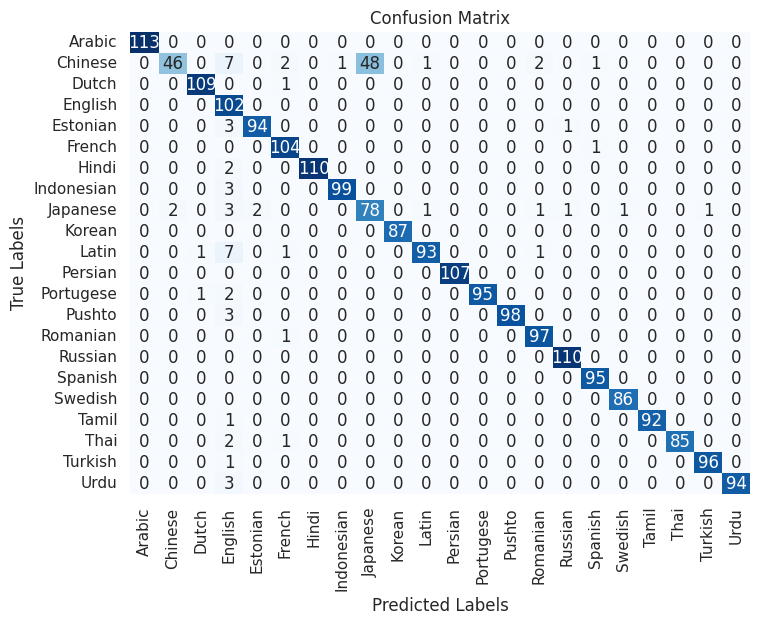

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true contains the true labels and y_pred contains the predicted labels
conf_matrix = confusion_matrix(y_test,predict_Y)

# Define class labels if available
class_labels = ['Arabic', 'Chinese' ,'Dutch' ,'English', 'Estonian', 'French', 'Hindi',
 'Indonesian' ,'Japanese', 'Korean' ,'Latin' ,'Persian' ,'Portugese' ,'Pushto',
 'Romanian' ,'Russian' ,'Spanish', 'Swedish' ,'Tamil' ,'Thai' ,'Turkish', 'Urdu']  # Replace with your class labels if available

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1)  # Adjust font size as needed
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_true contains the true labels and predict_Y contains the predicted labels
report = classification_report(y_test,predict_Y)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       0.96      0.43      0.59       108
           2       0.98      0.99      0.99       110
           3       0.73      1.00      0.85       102
           4       0.98      0.96      0.97        98
           5       0.95      0.99      0.97       105
           6       1.00      0.98      0.99       112
           7       0.99      0.97      0.98       102
           8       0.62      0.87      0.72        90
           9       1.00      1.00      1.00        87
          10       0.98      0.90      0.94       103
          11       1.00      1.00      1.00       107
          12       1.00      0.97      0.98        98
          13       1.00      0.97      0.98       101
          14       0.96      0.99      0.97        98
          15       0.98      1.00      0.99       110
          16       0.98      1.00      0.99        95
    

##Predictions

In [ ]:
with open('/content/Language_detection_model_v1.pkl', 'rb') as file:
    model_language = pickle.load(file)

with open('/content/Language_encoder.pkl', 'rb') as file:
    encode_language = pickle.load(file)

def predict(text):
    pred =model_language.predict([clean_txt(text)])
    ans = encode_language.inverse_transform(pred)
    return ans[0]

In [ ]:
predict('my name is harsh'), predict('मेरा नाम हर्ष हे'), predict('mi nombre es harsh'), predict('меня зовут Харш'), predict('mon nom est harsh'),predict("シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に."),predict("de spons behoort tot het geslacht haliclona en.")

('English', 'Hindi', 'Spanish', 'Russian', 'French', 'Japanese', 'Dutch')